데이터 불러오기

In [2]:
import pandas as pd

games = pd.read_csv("Data/games.csv", parse_dates=["GAME_DATE_EST"])
details = pd.read_csv("Data/games_details.csv", low_memory=False)
teams = pd.read_csv("Data/teams.csv")
ranking = pd.read_csv("Data/ranking.csv")
player = pd.read_csv("Data/players.csv")

배경 지식 : 

분석관점 : 우승 시즌을 기준으로, 팀의 핵심 포지션 선수들이 리그 전체 기준에서 얼마나 경쟁력을 갖추게 되었는가?

내가 필요로 하는 데이터 및 컬럼
games.csv
'GAME_ID", "SEASON"

games_details.csv
'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'PLUS_MINUS', 'FGM', 'FGA', 'FG3M', 'FTA'

games 전처리

In [7]:
games.info()
games.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[us]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  str           
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          26552 non-null 

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

99개의 정체 확인

In [8]:
error_games = games[games['PTS_home'].isnull()]

print(error_games['GAME_STATUS_TEXT'].value_counts())

GAME_STATUS_TEXT
Final    99
Name: count, dtype: int64


상위 5개 행만 확인

In [9]:
print(error_games[['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID']].head())

      GAME_DATE_EST GAME_STATUS_TEXT  HOME_TEAM_ID
19175    2003-10-24            Final    1610612753
19176    2003-10-24            Final    1610612737
19177    2003-10-24            Final    1610612738
19178    2003-10-24            Final    1610612759
19179    2003-10-24            Final    1610612749


경기가 끝난상태인데 기록이 없는 것이므로 삭제 진행.

In [11]:
clean_games = games.dropna(subset = ["PTS_home"])

print(clean_games.info())

<class 'pandas.DataFrame'>
Index: 26552 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26552 non-null  datetime64[us]
 1   GAME_ID           26552 non-null  int64         
 2   GAME_STATUS_TEXT  26552 non-null  str           
 3   HOME_TEAM_ID      26552 non-null  int64         
 4   VISITOR_TEAM_ID   26552 non-null  int64         
 5   SEASON            26552 non-null  int64         
 6   TEAM_ID_home      26552 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26552 non-null  int64         
 14  PTS_away          26552 non-null  floa

games_details 전처리

In [12]:
details.info()

<class 'pandas.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  str    
 3   TEAM_CITY          668628 non-null  str    
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  str    
 6   NICKNAME           53037 non-null   str    
 7   START_POSITION     255765 non-null  str    
 8   COMMENT            109689 non-null  str    
 9   MIN                558938 non-null  str    
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FTM          

In [13]:
details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

결측치1 : 109690건의 데이터부터 전처리 시작

MIN 출전시간이 없는 선수 왜 그런지 확인

In [14]:
error_min = details[details['MIN'].isnull()]

print(error_min['COMMENT'].value_counts().head())

COMMENT
DNP - Coach's Decision                      58054
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1161
DNP - Injury/Illness                         1151
Name: count, dtype: int64


혹시나 점수 기록이 있는지 확인해보았다

In [15]:
print(error_min['PTS'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PTS, dtype: float64


기록이 없는 선수들이므로 삭제(분석 관점이 선수들의 평균 기록 비교이기 때문)

In [26]:
clean_details = details.dropna(subset = 'MIN')

결측치2 : START_POSITION이 없는 41만건 확인
벤치에 있는 선수여서 선발 포지션이 없는지 확인

In [16]:
if_bench = details[(details['START_POSITION'].isnull())]

if_bench = details[(details['MIN'].notnull())]

if_bench.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


벤치 선수의 출전 기록 확인 후

선발은 양팀 합쳐서 10명인데 10이 아닌 경기도 있을 수 있음

In [30]:
starters_count = clean_details.groupby("GAME_ID")["START_POSITION"].count()

bad_games = starters_count[starters_count != 10].index

print(len(starters_count))
print(len(bad_games))

print(1024/26523*100)

26523
1024


AttributeError: 'Index' object has no attribute 'head'

중복데이터이거나, 입력 누락, 선발이 0의 경우 아무 기록도 없기 때문에 삭제가 가능하다고 판단
평균에 큰 영향을 안끼칠거 같아 1024개 삭제 진행

In [31]:
clean_details = clean_details[~clean_details['GAME_ID'].isin(bad_games)].copy()

선발은 아니었지만 경기기록이 있는 선수는 벤치로 분류

In [32]:
clean_details['START_POSITION'] = clean_details['START_POSITION'].fillna('bench')

In [34]:
clean_details.head(20)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
5,22200477,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,bench,NaN,18:04,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0
6,22200477,1610612759,SAS,San Antonio,203926,Doug McDermott,Doug,bench,NaN,16:55,...,1.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,5.0,-10.0
7,22200477,1610612759,SAS,San Antonio,1626196,Josh Richardson,Josh,bench,NaN,21:20,...,1.0,2.0,3.0,3.0,0.0,0.0,1.0,2.0,14.0,-2.0
8,22200477,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,bench,NaN,21:10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,9.0,-6.0
9,22200477,1610612759,SAS,San Antonio,1628966,Keita Bates-Diop,Keita,bench,NaN,9:16,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,-1.0


In [35]:
clean_details.info()

<class 'pandas.DataFrame'>
Index: 533563 entries, 0 to 665968
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            533563 non-null  int64  
 1   TEAM_ID            533563 non-null  int64  
 2   TEAM_ABBREVIATION  533563 non-null  str    
 3   TEAM_CITY          533563 non-null  str    
 4   PLAYER_ID          533563 non-null  int64  
 5   PLAYER_NAME        533563 non-null  str    
 6   NICKNAME           43396 non-null   str    
 7   START_POSITION     533563 non-null  str    
 8   COMMENT            0 non-null       str    
 9   MIN                533563 non-null  str    
 10  FGM                533563 non-null  float64
 11  FGA                533563 non-null  float64
 12  FG_PCT             533563 non-null  float64
 13  FG3M               533563 non-null  float64
 14  FG3A               533563 non-null  float64
 15  FG3_PCT            533563 non-null  float64
 16  FTM               

In [36]:
print(clean_games['SEASON'].unique())

[2022 2021 2020 2019 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004
 2003 2018 2017 2016 2015 2014]


클린 데이터 merge 진행

clean_games 에서 시즌 정보를 가져와야함

GAME_ID를 기준으로 Left 진행

In [37]:
merged_df = pd.merge(clean_details, clean_games[['GAME_ID', 'SEASON']], on = 'GAME_ID', how = 'left')

merged_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 533657 entries, 0 to 533656
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            533657 non-null  int64  
 1   TEAM_ID            533657 non-null  int64  
 2   TEAM_ABBREVIATION  533657 non-null  str    
 3   TEAM_CITY          533657 non-null  str    
 4   PLAYER_ID          533657 non-null  int64  
 5   PLAYER_NAME        533657 non-null  str    
 6   NICKNAME           43396 non-null   str    
 7   START_POSITION     533657 non-null  str    
 8   COMMENT            0 non-null       str    
 9   MIN                533657 non-null  str    
 10  FGM                533657 non-null  float64
 11  FGA                533657 non-null  float64
 12  FG_PCT             533657 non-null  float64
 13  FG3M               533657 non-null  float64
 14  FG3A               533657 non-null  float64
 15  FG3_PCT            533657 non-null  float64
 16  FTM          

전처리

MIN 출전시간이 문자로 되어 있어 숫자로 변환해야함

숫자로 만드는 함수 먼저 진행

파생컬럼 'PLAY_TIME' 생성

In [46]:
def min_to_float(x) :
    try :
        if isinstance(x, str) and ':' in x :
            m, s = x.split(':')
            return float(m) + float(s)/60
        else :
            return float(x)
    except :
        return 0.0

merged_df['PLAY_TIME'] = merged_df['MIN'].apply(min_to_float)

merged_df.head(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,PLAY_TIME
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022,18.100000
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022,31.016667
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022,21.700000
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022,30.333333
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022,27.733333
5,22200477,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,bench,NaN,18:04,...,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0,2022,18.066667
6,22200477,1610612759,SAS,San Antonio,203926,Doug McDermott,Doug,bench,NaN,16:55,...,4.0,1.0,0.0,0.0,1.0,0.0,5.0,-10.0,2022,16.916667
7,22200477,1610612759,SAS,San Antonio,1626196,Josh Richardson,Josh,bench,NaN,21:20,...,3.0,3.0,0.0,0.0,1.0,2.0,14.0,-2.0,2022,21.333333
8,22200477,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,bench,NaN,21:10,...,0.0,0.0,0.0,0.0,1.0,2.0,9.0,-6.0,2022,21.166667
9,22200477,1610612759,SAS,San Antonio,1628966,Keita Bates-Diop,Keita,bench,NaN,9:16,...,1.0,0.0,0.0,0.0,0.0,1.0,4.0,-1.0,2022,9.266667


14-15 시즌 정보를 필요로 하기 때문에
시즌 전체와 팀 정보 분류
(별칭은 팀에서 정한 기준으로 작성 14-15 시즌이면 15로 지정)

In [44]:
nba_15 = merged_df[merged_df['SEASON'] == 2014].copy()

gsw_15 = nba_15[nba_15['TEAM_ABBREVIATION'] == 'GSW'].copy()

gsw_15.head(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
448287,41400406,1610612744,GSW,Golden State,2738,Andre Iguodala,NaN,F,NaN,36:21,...,4.0,5.0,5.0,2.0,0.0,0.0,4.0,25.0,14.0,2014
448288,41400406,1610612744,GSW,Golden State,203084,Harrison Barnes,NaN,F,NaN,35:27,...,2.0,2.0,2.0,1.0,0.0,0.0,3.0,9.0,-2.0,2014
448289,41400406,1610612744,GSW,Golden State,203110,Draymond Green,NaN,C,NaN,41:28,...,10.0,11.0,10.0,3.0,1.0,3.0,5.0,16.0,11.0,2014
448290,41400406,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,G,NaN,24:40,...,5.0,5.0,2.0,0.0,1.0,2.0,6.0,5.0,2.0,2014
448291,41400406,1610612744,GSW,Golden State,201939,Stephen Curry,NaN,G,NaN,43:06,...,6.0,6.0,8.0,3.0,0.0,3.0,3.0,25.0,14.0,2014
448292,41400406,1610612744,GSW,Golden State,2733,Shaun Livingston,NaN,bench,NaN,32:19,...,2.0,3.0,0.0,0.0,1.0,0.0,3.0,10.0,3.0,2014
448293,41400406,1610612744,GSW,Golden State,203105,Festus Ezeli,NaN,bench,NaN,10:56,...,1.0,4.0,0.0,0.0,1.0,1.0,2.0,10.0,5.0,2014
448294,41400406,1610612744,GSW,Golden State,2571,Leandro Barbosa,NaN,bench,NaN,14:30,...,2.0,3.0,1.0,2.0,0.0,0.0,1.0,5.0,-9.0,2014
448295,41400406,1610612744,GSW,Golden State,101135,David Lee,NaN,bench,NaN,1:13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014
448313,41400405,1610612744,GSW,Golden State,2738,Andre Iguodala,NaN,F,NaN,42:28,...,7.0,8.0,7.0,3.0,0.0,0.0,2.0,14.0,16.0,2014


궁금증 발생!

선발 출장 수 / 벤치 출장 수
    선발 시 어떤 포지션으로 출전 했는지? - 시간 남으면 하자..

출장 경기 수

우리팀만 분류하기

In [51]:
nba_15['is_start'] = nba_15['START_POSITION'] != 'bench'
nba_15['is_bench'] = nba_15['START_POSITION'] == 'bench'

start_or_bench = nba_15.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION'])[['is_start', 'is_bench']].sum().reset_index()

start_or_bench['total_play_year'] = start_or_bench['is_start'] + start_or_bench['is_bench']

print(start_or_bench[start_or_bench['TEAM_ABBREVIATION'] == 'GSW'].sort_values('is_start', ascending = False))

              PLAYER_NAME TEAM_ABBREVIATION  is_start  is_bench  \
582         Stephen Curry               GSW       108         0   
235       Harrison Barnes               GSW       108         3   
387         Klay Thompson               GSW       105         0   
173        Draymond Green               GSW       101         7   
35           Andrew Bogut               GSW        89         3   
145             David Lee               GSW        11        58   
439     Marreese Speights               GSW         9        83   
205          Festus Ezeli               GSW         7        61   
29         Andre Iguodala               GSW         7        99   
360        Justin Holiday               GSW         4        68   
568      Shaun Livingston               GSW         2        97   
489         Ognjen Kuzmic               GSW         2        21   
473       Nemanja Nedovic               GSW         1         4   
410       Leandro Barbosa               GSW         1        9

/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/111289805.py:21: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/111289805.py:21: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/111289805.py:21: UserWarning: Glyph 48292 (\N{HANGUL SYLLABLE BEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/111289805.py:21: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/t2025-m0050/Introductory-Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2025-

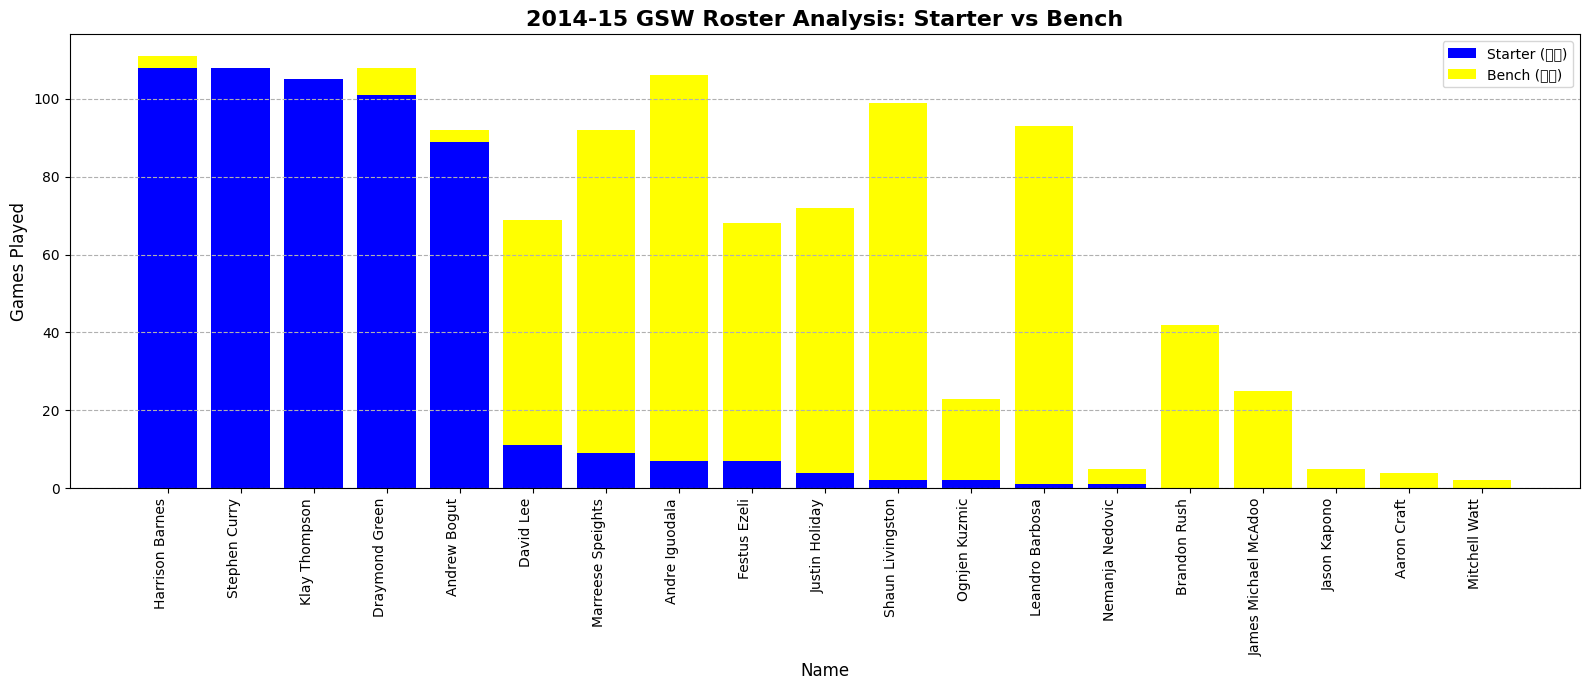

In [111]:
gsw_roster = start_or_bench[start_or_bench['TEAM_ABBREVIATION'] == 'GSW'].sort_values(by=['is_start', 'total_play_year'], ascending=[False, False])

import matplotlib.pyplot as plt

plt.figure(figsize = (16, 7))

players = gsw_roster['PLAYER_NAME']
starts = gsw_roster['is_start']
bench = gsw_roster['is_bench']

p1 = plt.bar(players, starts, label='Starter (선발)', color='blue')
p2 = plt.bar(players, bench, bottom=starts, label='Bench (벤치)', color='yellow')

plt.title('2014-15 GSW Roster Analysis: Starter vs Bench', fontsize=16, fontweight='bold')
plt.ylabel('Games Played', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=1)

plt.tight_layout()
plt.show()

In [53]:
merged_df.to_csv('clean_data.csv', index=False, encoding='utf-8-sig')

팀 주전 선수와 리그 상위선수들, 평균과의 비교
    - 공격기준, 수비기준

1차 지표들을 통해 2차 지표 생성
    
    TS% = PTS / 2(FGA + 0.44 * FTA)
    0.44는 테크니컬 파울이나 앤드원(And-1) 상황을 고려하여 도출된 통계적 계수

    eFG% = FGM + (0.5 * 3PM) / FGA
    3점슛에 가중치 0.5를 줌
    
    Net Rating : 100 * (OFFRtg - DEFRtg)
        +10 이상이면 리그를 지배하는 수준, 만약 개인기록은 평범하지만 Net Rating이 높다면 보이지 않는 부분에서 팀 승리에 결정적인 역할을 함

In [86]:
df = pd.read_csv('/Users/t2025-m0050/Introductory-Project/clean_data.csv')

/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/2054514829.py:1: DtypeWarning: Columns (0: NICKNAME) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/t2025-m0050/Introductory-Project/clean_data.csv')


df_2014 = df[(df['SEASON'] == 2014) & (df['START_POSITION'].isin(['G', 'F', 'C']))]

basic_stats = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'PLUS_MINUS']

player_avg = df_2014.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])[basic_stats].mean(numeric_only=True).reset_index()

game_counts = df_2014.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])['GAME_ID'].count().reset_index(name='GAME_COUNT')

player_avg = pd.merge(player_avg, game_counts, on=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])

player_avg = player_avg[player_avg['GAME_COUNT'] >= 10]

gsw_players = player_avg[player_avg['TEAM_ABBREVIATION'] == 'GSW']
league_players = player_avg[player_avg['TEAM_ABBREVIATION'] != 'GSW']

gsw_g = gsw_players[gsw_players['START_POSITION'] == 'G'].sort_values('PTS', ascending=False).head(2)
gsw_f = gsw_players[gsw_players['START_POSITION'] == 'F'].sort_values('PTS', ascending=False).head(2)
gsw_c = gsw_players[gsw_players['START_POSITION'] == 'C'].sort_values('PTS', ascending=False).head(1)

top_g = league_players[league_players['START_POSITION'] == 'G'].sort_values('PTS', ascending=False).head(10)
top_f = league_players[league_players['START_POSITION'] == 'F'].sort_values('PTS', ascending=False).head(10)
top_c = league_players[league_players['START_POSITION'] == 'C'].sort_values('PTS', ascending=False).head(5)

gsw_starters = pd.concat([gsw_g, gsw_f, gsw_c])
league_top = pd.concat([top_g, top_f, top_c])

print("GSW 주전 평균")
print(gsw_starters.groupby('START_POSITION')[basic_stats].mean(numeric_only=True).round(2))

print("리그 상위권 평균")
print(league_top.groupby('START_POSITION')[basic_stats].mean(numeric_only=True).round(2))

팀의 주요 선수들이 리그 주요 선수들과 비교했을떄 경쟁력을 가지는지를 확인

In [100]:
df_2014 = df[(df['SEASON'] == 2014) & (df['START_POSITION'].isin(['G', 'F', 'C']))]

basic_stats = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'PLUS_MINUS', 'FGM', 'FGA', 'FG3M', 'FTA']

player_avg = df_2014.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])[basic_stats].mean(numeric_only=True).reset_index()

game_counts = df_2014.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])['GAME_ID'].count().reset_index(name='GAME_COUNT')
player_avg = pd.merge(player_avg, game_counts, on=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'START_POSITION'])
player_avg = player_avg[player_avg['GAME_COUNT'] >= 10]

player_avg['eFG%'] = (player_avg['FGM'] + 0.5 * player_avg['FG3M']) / player_avg['FGA'] * 100

player_avg['TS%'] = player_avg['PTS'] / (2 * (player_avg['FGA'] + 0.44 * player_avg['FTA'])) * 100

gsw_players = player_avg[player_avg['TEAM_ABBREVIATION'] == 'GSW']
league_players = player_avg[player_avg['TEAM_ABBREVIATION'] != 'GSW']

gsw_g = gsw_players[gsw_players['START_POSITION'] == 'G'].sort_values('PTS', ascending=False).head(2)
gsw_f = gsw_players[gsw_players['START_POSITION'] == 'F'].sort_values('PTS', ascending=False).head(2)
gsw_c = gsw_players[gsw_players['START_POSITION'] == 'C'].sort_values('PTS', ascending=False).head(1)

top_g = league_players[league_players['START_POSITION'] == 'G'].sort_values('PTS', ascending=False).head(10)
top_f = league_players[league_players['START_POSITION'] == 'F'].sort_values('PTS', ascending=False).head(10)
top_c = league_players[league_players['START_POSITION'] == 'C'].sort_values('PTS', ascending=False).head(5)

gsw_starters = pd.concat([gsw_g, gsw_f, gsw_c])
league_top = pd.concat([top_g, top_f, top_c])

print("GSW 주전 경쟁력")
print(gsw_starters.groupby('START_POSITION').mean(numeric_only=True).round(2))

print("리그 상위권 평균")
print(league_top.groupby('START_POSITION').mean(numeric_only=True).round(2))

GSW 주전 경쟁력
                FG_PCT  FG3_PCT  FT_PCT   REB   AST   STL   BLK    TO    PTS  \
START_POSITION                                                                 
C                 0.57     0.00    0.15  8.04  2.67  0.63  1.72  1.53   6.01   
F                 0.53     0.14    0.46  6.97  3.18  1.00  0.72  1.90  12.16   
G                 0.47     0.44    0.73  3.81  5.09  1.51  0.52  2.62  22.64   

                PLUS_MINUS   FGM    FGA  FG3M   FTA  GAME_COUNT   eFG%    TS%  
START_POSITION                                                                 
C                     6.45  2.84   4.97  0.00  0.73        89.0  57.24  56.84  
F                     7.08  5.03   9.29  0.67  2.12        54.0  58.32  60.14  
G                     9.85  7.95  16.86  3.38  3.81       106.5  57.14  60.97  
리그 상위권 평균
                FG_PCT  FG3_PCT  FT_PCT    REB   AST   STL   BLK    TO    PTS  \
START_POSITION                                                                  
C               

In [104]:
Off_cols = ['PTS', 'AST', 'eFG%', 'TS%']
Def_cols = ['REB', 'STL', 'BLK', 'TO']

print("GSW 주전 공격 경쟁력")
print(gsw_starters.groupby('START_POSITION')[Off_cols].mean(numeric_only=True).round(2))

print("리그 상위권 공격지표 평균")
print(league_top.groupby('START_POSITION')[Off_cols].mean(numeric_only=True).round(2))

GSW 주전 공격 경쟁력
                  PTS   AST   eFG%    TS%
START_POSITION                           
C                6.01  2.67  57.24  56.84
F               12.16  3.18  58.32  60.14
G               22.64  5.09  57.14  60.97
리그 상위권 공격지표 평균
                  PTS   AST   eFG%    TS%
START_POSITION                           
C               19.85  2.13  50.88  55.45
F               22.44  3.42  51.38  56.52
G               21.91  5.81  48.04  54.64


In [106]:
print("GSW 주전 수비 경쟁력")
print(gsw_starters.groupby('START_POSITION')[Def_cols].mean(numeric_only=True).round(2))

print("리그 상위권 수비지표 평균")
print(league_top.groupby('START_POSITION')[Def_cols].mean(numeric_only=True).round(2))

GSW 주전 수비 경쟁력
                 REB   STL   BLK    TO
START_POSITION                        
C               8.04  0.63  1.72  1.53
F               6.97  1.00  0.72  1.90
G               3.81  1.51  0.52  2.62
리그 상위권 수비지표 평균
                  REB   STL   BLK    TO
START_POSITION                         
C               10.07  0.82  1.39  2.41
F                7.59  1.04  0.85  2.42
G                4.69  1.38  0.31  2.99


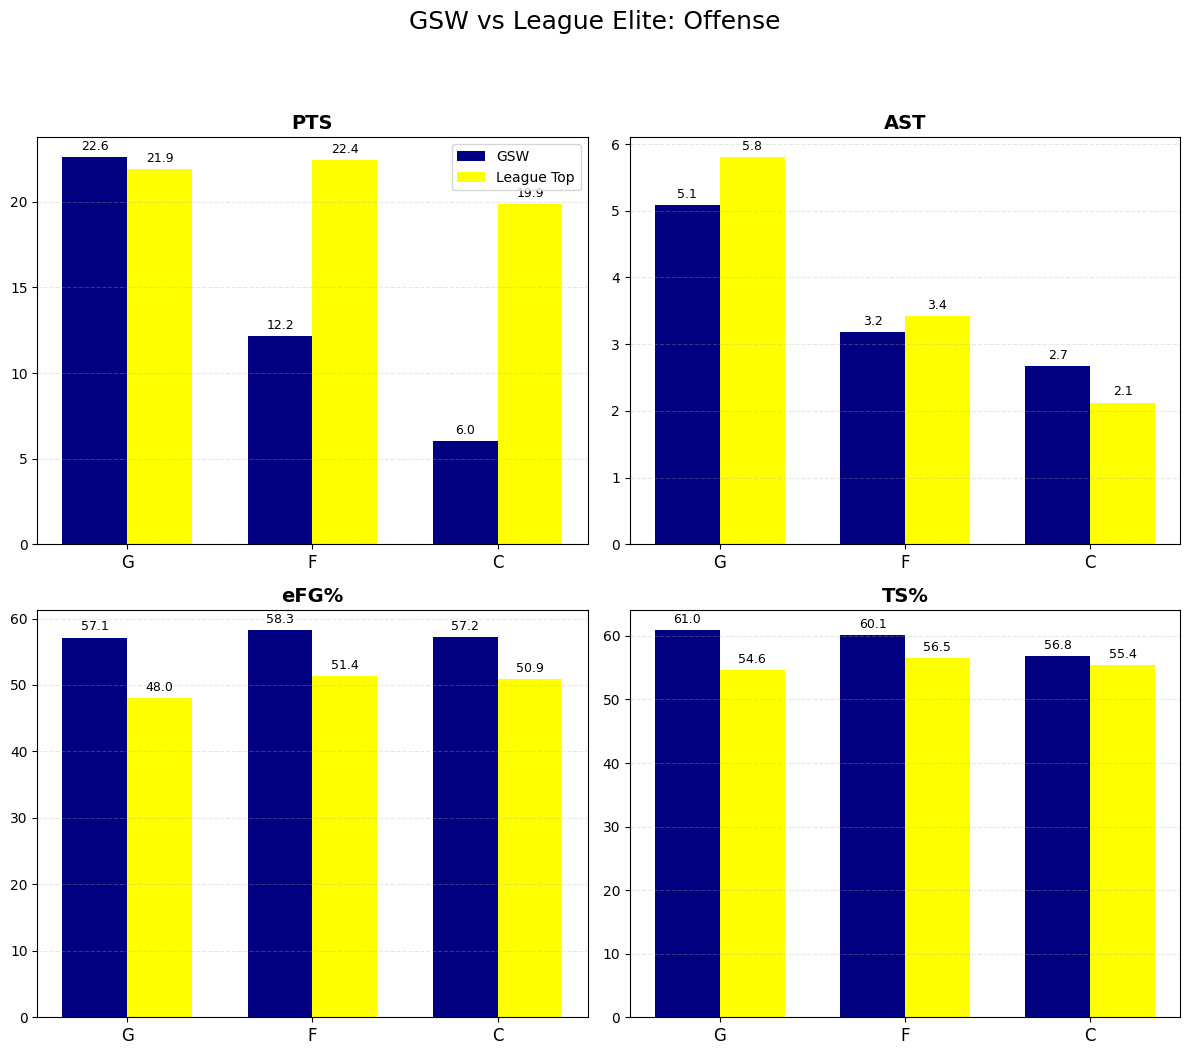

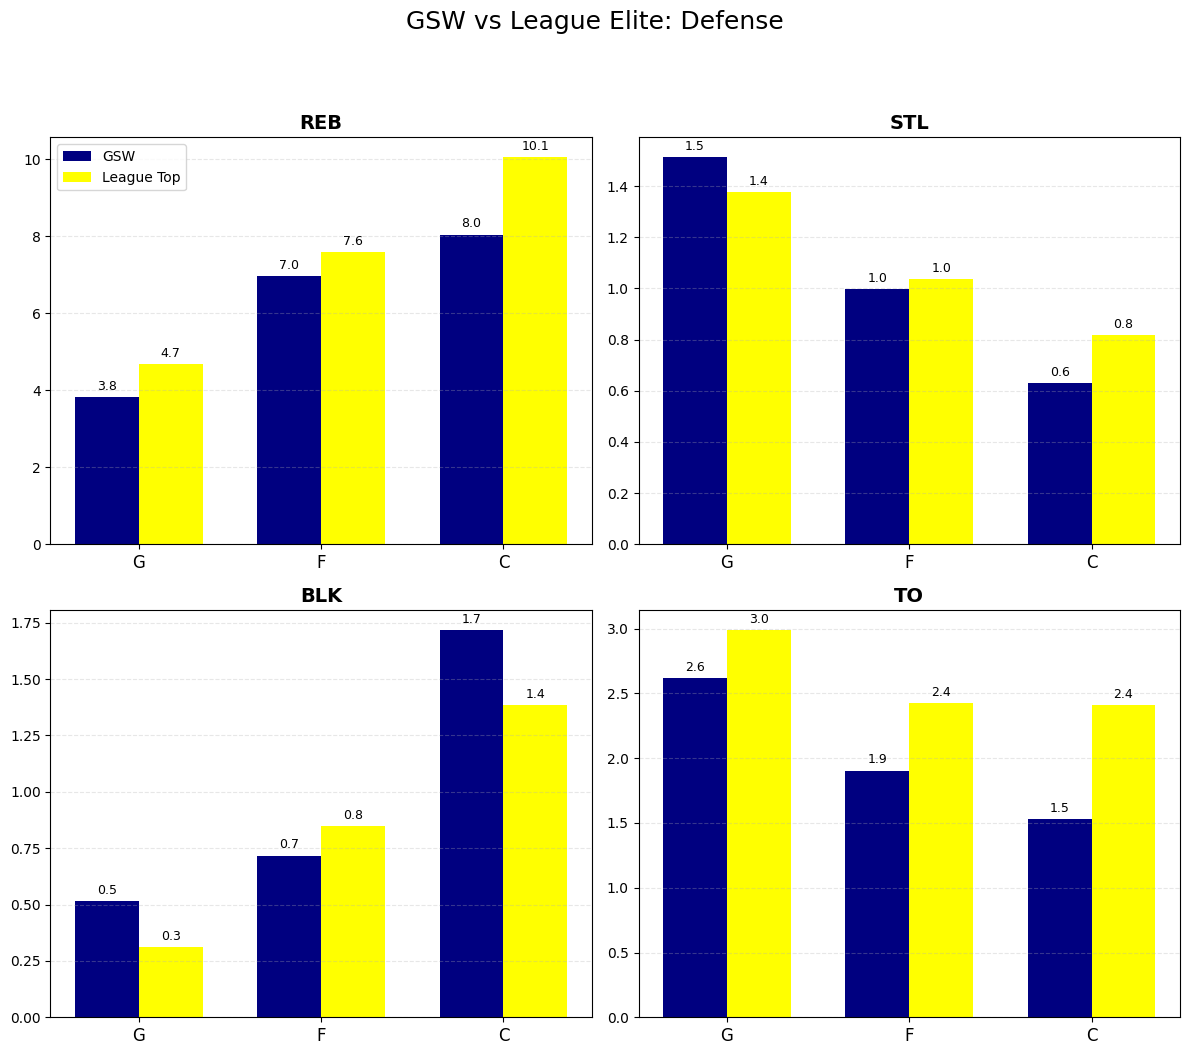

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gsw_mean = gsw_starters.groupby('START_POSITION').mean(numeric_only=True)
league_mean = league_top.groupby('START_POSITION').mean(numeric_only=True)

def plot_comparison(gsw_data, league_data, columns, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    positions = ['G', 'F', 'C']
    
    color_gsw = 'navy'
    color_league = 'yellow'
    
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        ax = axes[i]
        
        gsw_vals = [gsw_data.loc[pos, col] for pos in positions]
        league_vals = [league_data.loc[pos, col] for pos in positions]
        
        x = np.arange(len(positions))
        width = 0.35
        
        rects1 = ax.bar(x - width/2, gsw_vals, width, label='GSW', color=color_gsw)
        rects2 = ax.bar(x + width/2, league_vals, width, label='League Top', color=color_league)
        
        ax.set_title(col, fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(positions, fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        
        ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=9)
        ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=9)
        
        if i == 0:
            ax.legend()
            
    fig.suptitle(title, fontsize=18, y=1.05)
    plt.tight_layout()
    plt.show()

Off_cols = ['PTS', 'AST', 'eFG%', 'TS%']
plot_comparison(gsw_mean, league_mean, Off_cols, 'GSW vs League Elite: Offense')

Def_cols = ['REB', 'STL', 'BLK', 'TO']
plot_comparison(gsw_mean, league_mean, Def_cols, 'GSW vs League Elite: Defense')

In [103]:
df = pd.read_csv('clean_data.csv')

df_2014 = df[df['SEASON'] == 2014]

bench_df = df_2014[df_2014['START_POSITION'] == 'bench']

sub_avg = bench_df.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION'])[basic_stats].mean(numeric_only=True).reset_index()

bench_counts = bench_df.groupby(['PLAYER_NAME', 'TEAM_ABBREVIATION'])['GAME_ID'].count().reset_index(name='GAME_COUNT')
sub_avg = pd.merge(sub_avg, bench_counts, on=['PLAYER_NAME', 'TEAM_ABBREVIATION'])

sub_avg = sub_avg[sub_avg['GAME_COUNT'] >= 30]

sub_avg['eFG%'] = (sub_avg['FGM'] + 0.5 * sub_avg['FG3M']) / sub_avg['FGA'] * 100
sub_avg['TS%'] = sub_avg['PTS'] / (2 * (sub_avg['FGA'] + 0.44 * sub_avg['FTA'])) * 100

gsw_sub = sub_avg[sub_avg['TEAM_ABBREVIATION'] == 'GSW']
league_sub = sub_avg[sub_avg['TEAM_ABBREVIATION'] != 'GSW']

cols = ['PTS', 'AST', 'REB', 'TS%', 'eFG%', 'PLUS_MINUS']

print(f"GSW 벤치 평균 (대상: {len(gsw_sub)}명)")
print(gsw_sub[cols].mean(numeric_only=True).round(2))

print(f"리그 전체 벤치 평균 (대상: {len(league_sub)}명)")
print(league_sub[cols].mean(numeric_only=True).round(2))

GSW 벤치 평균 (대상: 8명)
PTS            5.55
AST            1.38
REB            2.64
TS%           50.90
eFG%          47.61
PLUS_MINUS     0.89
dtype: float64
리그 전체 벤치 평균 (대상: 221명)
PTS            6.05
AST            1.30
REB            2.81
TS%           51.89
eFG%          48.42
PLUS_MINUS    -0.42
dtype: float64


/var/folders/rh/t7b3xwkj1b1fqxnnf8spzh800000gn/T/ipykernel_56616/670567438.py:1: DtypeWarning: Columns (0: NICKNAME) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')
